<a href="https://colab.research.google.com/github/ahmedmoustafa/genetic-variation/blob/main/genetic_variation_notebook_with_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genetic Variation

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Reading the variation TSV file directly as a compresed (.gz) from URL
# NA12878 is person2 in the pedigree

person2 = pd.read_table('https://github.com/ahmedmoustafa/platinum-genomes/blob/main/tsv/NA12878.tsv.gz?raw=true', compression='gzip')
person2.head()

,chr,pos,id,ref,alt
0,chr1,14677,rs201327123,G,A
1,chr1,15922,rs375964566,A,G
2,chr1,15956,rs112448831,G,A
3,chr1,16014,rs113442401;rs75082847,C,T
4,chr1,16298,rs62636498;rs77798508,C,T


In [3]:
person2.shape

(4489434, 5)

## Part I

In [4]:
unknown1 = pd.read_table('https://github.com/ahmedmoustafa/platinum-genomes/blob/main/tsv/Unknown1.tsv.gz?raw=true', compression='gzip')
unknown1.head()

,chr,pos,id,ref,alt
0,chr1,15956,rs112448831,G,A
1,chr1,16014,rs113442401;rs75082847,C,T
2,chr1,16068,rs372319358,T,C
3,chr1,16298,rs62636498;rs77798508,C,T
4,chr1,28511,rs773821537,G,A


In [5]:
unknown1.shape

(4415674, 5)

In [6]:
unknown2 = pd.read_table('https://github.com/ahmedmoustafa/platinum-genomes/blob/main/tsv/Unknown2.tsv.gz?raw=true', compression='gzip')
unknown2.head()

,chr,pos,id,ref,alt
0,chr1,15956,rs112448831,G,A
1,chr1,16014,rs113442401;rs75082847,C,T
2,chr1,16288,rs113141985,C,G
3,chr1,16298,rs62636498;rs77798508,C,T
4,chr1,16378,rs148220436,T,C


In [7]:
unknown2.shape

(4411044, 5)

In [8]:
person2_unknown1 = person2.merge(unknown1, on = ['chr', 'pos', 'alt'])
person2_unknown1.head()

,chr,pos,id_x,ref_x,alt,id_y,ref_y
0,chr1,15956,rs112448831,G,A,rs112448831,G
1,chr1,16014,rs113442401;rs75082847,C,T,rs113442401;rs75082847,C
2,chr1,16298,rs62636498;rs77798508,C,T,rs62636498;rs77798508,C
3,chr1,28511,rs773821537,G,A,rs773821537,G
4,chr1,30923,rs806731,G,T,rs806731,G


In [9]:
person2_unknown1.shape

(2788604, 7)

In [10]:
person2_unknown2 = person2.merge(unknown2, on = ['chr', 'pos', 'alt'])
person2_unknown2.head()

,chr,pos,id_x,ref_x,alt,id_y,ref_y
0,chr1,15956,rs112448831,G,A,rs112448831,G
1,chr1,16014,rs113442401;rs75082847,C,T,rs113442401;rs75082847,C
2,chr1,16298,rs62636498;rs77798508,C,T,rs62636498;rs77798508,C
3,chr1,28511,rs773821537,G,A,rs773821537,G
4,chr1,28558,rs371996741,C,T,rs371996741,C


In [11]:
person2_unknown2.shape

(3430907, 7)

In [12]:
person2_unknown1.shape[0]/(person2.shape[0] + unknown1.shape[0]) * 100

31.314656711631123

In [13]:
person2_unknown2.shape[0]/(person2.shape[0] + unknown2.shape[0]) * 100

38.54744655287053

## Part II

In [14]:
chr16 = person2.loc[person2['chr'] == "chr16"]
chr16.head()

,chr,pos,id,ref,alt
3631593,chr16,10054,rs62028702,A,C
3631594,chr16,10095,rs62028704,G,T
3631595,chr16,10185,rs117018261,C,G
3631596,chr16,10214,rs112858078,A,G
3631597,chr16,10291,rs76368850,T,C


In [15]:
chr16.shape

(132160, 5)

In [16]:
start = 1 # The start position
chromosome_length = 90338345 # The end position
window_size = 100000 # The window size
step = 10000 # The step (shift)

In [17]:
# Let's creat an empty dataframe with 3 columns
windows = pd.DataFrame(columns=['window', 'number_of_snps', 'freq_of_snps'])
windows

,window,number_of_snps,freq_of_snps


In [18]:
window_index = 0
window_start = start
while window_start + window_size - 1 <= chromosome_length:
    window_end = window_start + window_size - 1
    snps_count = ((chr16['pos'] >= window_start) & (chr16['pos'] < window_end)).sum()
    windows.loc[window_index] = [window_start, snps_count, snps_count/window_size]
    window_start = window_end
    window_index += 1

windows.head()

,window,number_of_snps,freq_of_snps
0,1.0,163.0,0.00163
1,100000.0,281.0,0.00281
2,199999.0,215.0,0.00215
3,299998.0,248.0,0.00248
4,399997.0,153.0,0.00153


In [19]:
windows.shape

(903, 3)

<Axes: xlabel='window', ylabel='number_of_snps'>

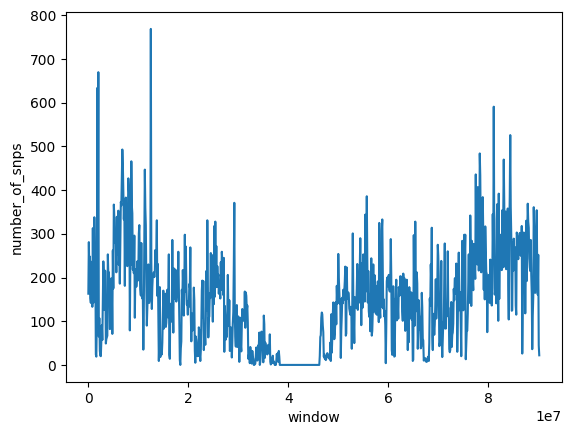

In [20]:
sns.lineplot(data = windows, x = 'window', y = 'number_of_snps')

In [21]:
windows['number_of_snps'].mean()

146.35658914728683

In [22]:
windows['number_of_snps'].median()

138.0

In [23]:
windows['number_of_snps'].max()

769.0

In [24]:
windows[windows['number_of_snps'] == windows['number_of_snps'].max()]

,window,number_of_snps,freq_of_snps
125,12499876.0,769.0,0.00769
